# Exercise 2

In [86]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

In [85]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [73]:
from sklearn.feature_selection import f_classif

In [62]:
arff_file = arff.loadarff('Diabetes.arff')

In [63]:
arff_file[1]

Dataset: diabetes
	Pregnancies's type is numeric
	Glucose's type is numeric
	BloodPressure's type is numeric
	SkinThickness's type is numeric
	Insulin's type is numeric
	BMI's type is numeric
	DiabetesPedigreeFunction's type is numeric
	Age's type is numeric
	Outcome's type is nominal, range is ('0', '1')

In [64]:
diabetes = pd.DataFrame(arff_file[0])
diabetes.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'1'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'0'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'1'


In [65]:
y = diabetes["Outcome"].copy()
X = diabetes.drop("Outcome", axis=1)

In [66]:
y

0      b'1'
1      b'0'
2      b'1'
3      b'0'
4      b'1'
       ... 
763    b'0'
764    b'0'
765    b'0'
766    b'1'
767    b'0'
Name: Outcome, Length: 768, dtype: object

In [67]:
f_statistic, p_values = f_classif(X, y)
p_values

array([5.06512730e-10, 8.93543165e-43, 7.15139001e-02, 3.83477048e-02,
       2.86186460e-04, 1.22980749e-16, 1.25460701e-06, 2.20997546e-11])

In [96]:
best_idx = f_statistic.argmax()
worst_idx = f_statistic.argmin()
best_feature = X.columns[best_idx]
worst_feature = X.columns[worst_idx]

print("Best Feature: ", X.columns[best_idx])
print("Worst Feature: ", X.columns[worst_idx])


Best Feature:  Glucose
Worst Feature:  BloodPressure


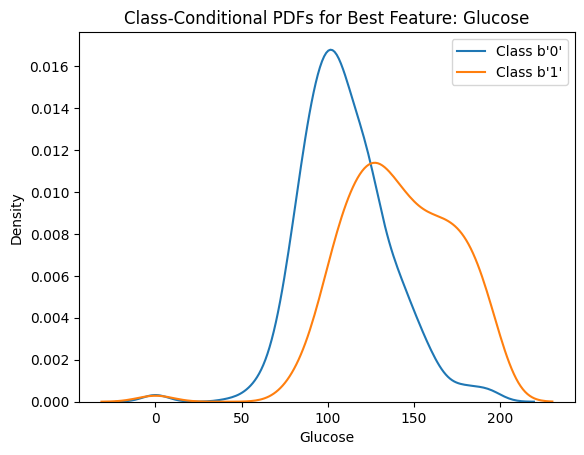

In [97]:
classes = np.unique(y)
for cls in classes:
    cls_x_best_feature = X.loc[y==cls, best_feature]
    sns.kdeplot(cls_x_best_feature, label= f"Class {cls}")

plt.title(f"Class-Conditional PDFs for Best Feature: {best_feature}")
plt.xlabel(best_feature)
plt.ylabel("Density")
plt.legend()
plt.show()

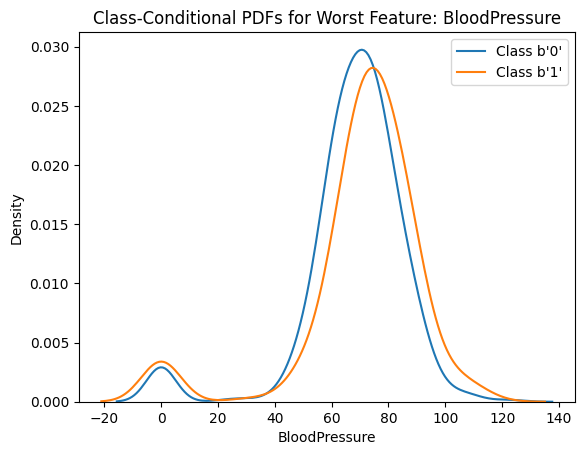

In [99]:
classes = np.unique(y)
for cls in classes:
    cls_x_worst_feature = X.loc[y==cls, worst_feature]
    sns.kdeplot(cls_x_worst_feature, label= f"Class {cls}")

plt.title(f"Class-Conditional PDFs for Worst Feature: {worst_feature}")
plt.xlabel(worst_feature)
plt.ylabel("Density")
plt.legend()
plt.show()